Missing values in each column:
 Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Mean Squared Error (MSE): 1942898100.9205022
Mean Absolute Error (MAE): 28509.305089466125
R-squared: 0.7466994168905099


<ipython-input-5-809a19c1b56c>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)


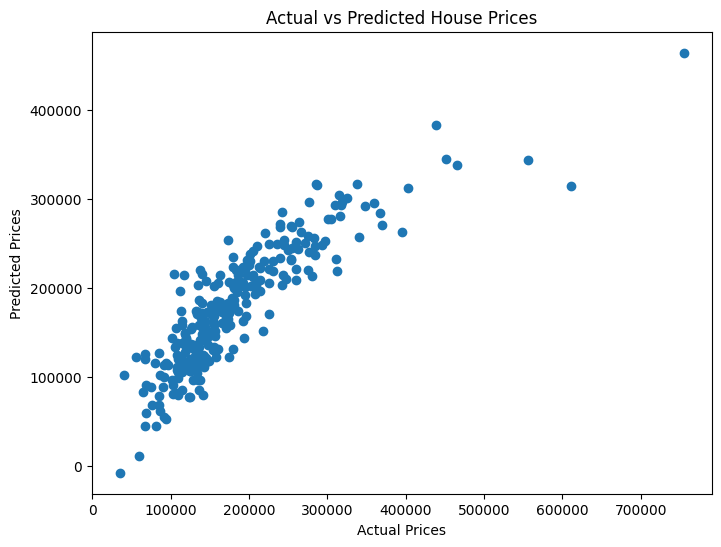

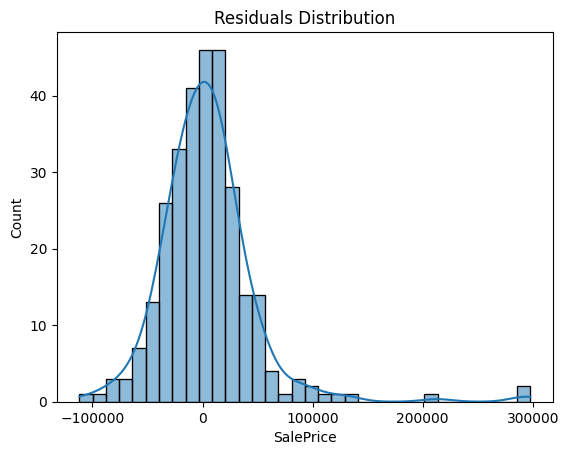

Predicted House Price for new data: [204884.72863943]


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
data = pd.read_csv('/content/train.csv')  # Adjust the path if not using Google Colab

# Step 2: Data Preprocessing
# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

# Fill missing values for numeric columns with mean
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Fill missing values for categorical columns with mode
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

# Step 3: Feature Selection
# Select relevant features (SquareFootage, Bedrooms, Bathrooms, etc.)
# You may need to adjust this according to the columns available in your dataset
X = data[['GrLivArea', 'OverallQual', 'TotRmsAbvGrd']]  # Example feature selection
y = data['SalePrice']  # Target variable (house price)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r_squared = model.score(X_test, y_test)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r_squared}")

# Step 8: Plot Actual vs Predicted Prices
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

# Step 9: Plot Residuals (Difference between Actual and Predicted)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

# Step 10: Make Predictions for New Data (example)
# Example for predicting the price of a house with specific features
new_data = pd.DataFrame({'GrLivArea': [1500], 'OverallQual': [7], 'TotRmsAbvGrd': [8]})
predicted_price = model.predict(new_data)
print(f"Predicted House Price for new data: {predicted_price}")
